<a href="https://colab.research.google.com/github/magmatic654/Alura-Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

Unimos las tiendas en un solo DataFrame

In [ ]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
2289,Secadora de ropa,Electrodomésticos,623800.0,33700.0,16/02/2020,Camila Rivera,Cali,5,Tarjeta de crédito,8,3.43722,-76.52250,Tienda 3
85,Muñeca bebé,Juguetes,44800.0,2600.0,20/12/2020,Maria Alfonso,Pasto,5,Tarjeta de crédito,10,1.21361,-77.28111,Tienda 1
2331,Sillón,Muebles,288800.0,15600.0,24/11/2021,Pedro Gomez,Bogotá,5,Tarjeta de crédito,5,4.60971,-74.08175,Tienda 4
1537,Silla de oficina,Muebles,480600.0,23800.0,25/08/2022,Felipe Santos,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 2
397,Cuerda para saltar,Deportes y diversión,20200.0,0.0,16/03/2023,Maria Alfonso,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 1


#1. Análisis de facturación




Calculamos los ingresos de cada tienda

In [ ]:
ingresos_por_tienda = df_tiendas.groupby('Tienda')['Precio'].sum().rename('Ingresos')
ingresos_por_tienda

,Ingresos
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


Determinar la tienda con menores ingresos

In [ ]:
tienda_menor_ingreso = ingresos_por_tienda.idxmin()
menor_ingreso = ingresos_por_tienda.min()
print(tienda_menor_ingreso, 'con', menor_ingreso)


Tienda 4 con 1038375700.0


## Grafico de Barras



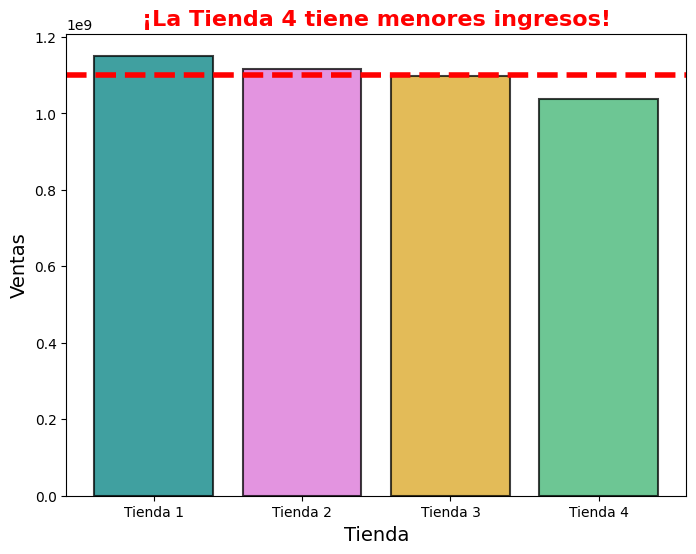

In [232]:
import matplotlib.pyplot as plt

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Asignar el mismo color para cada tienda
colors = [color_map[store] for store in ingresos_por_tienda.index]

# Titulo de Grafico
titulo = f'¡La {tienda_menor_ingreso} tiene menores ingresos!'

# Grafico de barras
plt.figure(figsize=(8, 6))
plt.bar(ingresos_por_tienda.index,
        ingresos_por_tienda.values,
        color=colors, edgecolor='black',
        linewidth=1.5,
        alpha=0.75
        )

# Configurar Grafico de barras
plt.title(titulo, weight='bold', size=16, color='red')
plt.xlabel('Tienda', size=14)
plt.ylabel('Ventas', size=14)

# Calcular promedio
promedio = ingresos_por_tienda.mean()

# Dibujar la linea de promedio
plt.axhline(y=promedio, color='red',
            linestyle='--',
            linewidth=4,
            )

# Mostrar Grafico
plt.show()

Como podemos ver, la tienda 4 tiene ingresos menores que el resto de las tiendas y se encuentra muy por debajo del promedio lo cual es preocupante.

# 2. Ventas por categoría

Agrupamos las ventas por categoria

In [ ]:
ventas_por_categoria = df_tiendas.groupby(['Tienda', 'Categoría del Producto']
                                          )['Producto'].count().rename('Ventas')


Determinamos las 3 categorias con mas ventas para cada tienda

In [ ]:
top_3_ventas_tiendas = ventas_por_categoria.groupby('Tienda', group_keys=False).nlargest(3)
top_3_ventas_tiendas

Tienda    Categoría del Producto
Tienda 1  Muebles                   465
          Electrónicos              448
          Juguetes                  324
Tienda 2  Muebles                   442
          Electrónicos              422
          Juguetes                  313
Tienda 3  Muebles                   499
          Electrónicos              451
          Juguetes                  315
Tienda 4  Muebles                   480
          Electrónicos              451
          Juguetes                  338
Name: Ventas, dtype: int64

# 3. Calificación promedio de la tienda


Determinamos la media de calificaciones para cada tienda para conocer la satisfaccion del cliente

In [197]:
calificaciones_promedio = df_tiendas.groupby('Tienda')['Calificación'].mean().round(2).sort_values()

In [214]:
tienda_menor_calificada = calificaciones_promedio.idxmin()
menor_calificacion = calificaciones_promedio[tienda_menor_calificada]

mejor_calificacion = calificaciones_promedio.tail(1).values[0]

### Grafico que muestra las calificaciones promedio para cada tienda

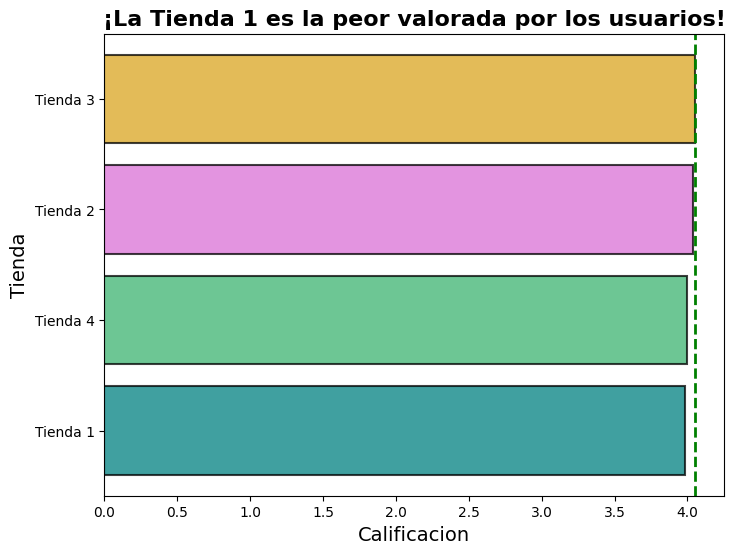

In [233]:
import matplotlib.pyplot as plt

# Definir el color de cada tienda
color_map = {
    'Tienda 1': 'teal',
    'Tienda 2': 'orchid',
    'Tienda 3': 'goldenrod',
    'Tienda 4': 'mediumseagreen'
}

# Asignar el mismo color para cada tienda
colors = [color_map[store] for store in calificaciones_promedio.index]

# Titulo de Grafico
titulo = f'¡La {tienda_menor_calificada} es la peor valorada por los usuarios!'

# Grafico de barras
plt.figure(figsize=(8, 6))
plt.barh(calificaciones_promedio.index,
        calificaciones_promedio.values,
        color=colors, edgecolor='black',
        linewidth=1.5,
        alpha=0.75
        )

# Configurar Grafico de barras
plt.title(titulo, weight='bold', size=16, color='black')
plt.ylabel('Tienda', size=14)
plt.xlabel('Calificacion', size=14)

# Linea vertical con la tienda con mayor calificacion
plt.axvline(mejor_calificacion,
            linewidth=2,
            color='green',
            linestyle='--')

# Mostrar Grafico
plt.show()

Aunque la Tienda 1 es la peor valorada por los usuarios, podemos ver que la Tienda 4 le sigue por no mucha diferencia

# 4. Productos más y menos vendidos

Determinamos las ventas de productos para cada tienda

In [ ]:
ventas_por_producto = df_tiendas.groupby(['Tienda', 'Producto'])['Producto'].count()

Determinamos los 3 productos mas vendidos para cada tienda

In [ ]:
top_3_productos_mas_vendidos = ventas_por_producto.groupby('Tienda', group_keys=False).nlargest(3)
top_3_productos_mas_vendidos

Tienda    Producto                 
Tienda 1  Armario                      60
          Microondas                   60
          TV LED UHD 4K                60
Tienda 2  Iniciando en programación    65
          Microondas                   62
          Batería                      61
Tienda 3  Kit de bancas                57
          Cama king                    56
          Mesa de comedor              56
Tienda 4  Cama box                     62
          Cubertería                   59
          Cama king                    56
Name: Producto, dtype: int64

Determinamos los 3 productos menos vendidos para cada tienda

In [ ]:
top_3_productos_menos_vendidos = ventas_por_producto.groupby('Tienda', group_keys=False).nsmallest(3)
top_3_productos_menos_vendidos

Tienda    Producto                 
Tienda 1  Auriculares con micrófono    33
          Celular ABXY                 33
          Olla de presión              35
Tienda 2  Juego de mesa                32
          Impresora                    34
          Mesa de comedor              34
Tienda 3  Bloques de construcción      35
          Microondas                   36
          Mochila                      36
Tienda 4  Guitarra eléctrica           33
          Armario                      34
          Guitarra acústica            37
Name: Producto, dtype: int64

# 5. Envío promedio por tienda

Calculamos el costo de envio promedio para cada tienda

In [ ]:
costo_envio_promedio = df_tiendas.groupby('Tienda')['Costo de envío'].mean()
costo_envio_promedio

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167
